# Laboratorio 1 - Análisis y Modelado de Datos FutAlpes F.C

**Integrantes:**
- Estudiante 1: Daniela Echavarria Yepes - 202111348
- Estudiante 2: Juan Manuel Rodriguez Diaz - 202013372
- Estudiante 3: [Nombre aquí]


# Introducción y Objetivo

En este laboratorio se construirá un modelo de regresión para estimar el precio de mercado de jugadores de fútbol 
basado en diversas métricas de rendimiento y características. 

El objetivo es:

- Explorar y entender los datos entregados.  
- Preparar los datos mediante limpieza y preprocesamiento.  
- Construir y entrenar un modelo de regresión.  
- Evaluar cuantitativa y cualitativamente el modelo.  
- Exportar el mejor modelo para su uso en producción. 

## Importación de librerías
Para el análisis de datos utilizamos las librerías **pandas**, **numpy**, **matplotlib**, **seaborn** y **sklearn**.  
Estas herramientas permiten la manipulación de datos, visualización de variables y limpieza eficiente del dataset.



In [14]:
# ====================================
# 1. Importación de librerías
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Configuración
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


# Carga de datos
Se cargó el archivo `datos_entrenamiento_laboratorio1(train_data).csv` y se exploraron las primeras filas.  
El dataset contiene información de múltiples variables, incluyendo variables numéricas y categóricas.

In [15]:
# ====================================
# 2. Carga de datos
# ====================================
df = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")
print(f"Filas y columnas: {df.shape}")
display(df.head())


Filas y columnas: (57934, 50)


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


# 1. Descripción del entendimiento de datos

En esta sección se describe la estructura inicial del dataset, explorando:
- Dimensiones
- Tipos de variables
- Valores nulos y duplicados
- Estadísticas descriptivas
- Outliers
- Correlaciones

Esto permite identificar problemas de calidad y comprender la información disponible.


## 1.1 Dimensiones del dataset


In [16]:
print("Dimensiones (filas, columnas):", df.shape)
display(df.head())


Dimensiones (filas, columnas): (57934, 50)


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


## 1.2 Tipos de datos y valores nulos


In [17]:
# Tipos y nulos (conteo y %)
resumen_calidad = pd.DataFrame({
    'tipo': df.dtypes.astype(str),
    'n_nulos': df.isna().sum(),
    '%_nulos': (df.isna().mean() * 100).round(2),
    'n_unicos': df.nunique(dropna=True)
}).sort_index()

display(resumen_calidad)

print("\nColumnas con nulos (si aplica):")
display(resumen_calidad[resumen_calidad['n_nulos'] > 0])


,tipo,n_nulos,%_nulos,n_unicos
%_de_duelos_aereos_ganados,float64,20957,36.17,79
%_de_regates_exitosos,float64,28722,49.58,54
Acarreos_ultimo_tercio,int64,0,0.00,16
Acciones_que_crean_tiros,int64,0,0.00,16
Centros,int64,0,0.00,24
Dia_partido,object,0,0.00,198
Duelos_aereos_ganados,int64,0,0.00,16
Edad,object,48,0.08,7114
Errores_defnsivos_ocasion_tiro,int64,0,0.00,4
Faltas_cometidas,int64,0,0.00,10



Columnas con nulos (si aplica):


,tipo,n_nulos,%_nulos,n_unicos
%_de_duelos_aereos_ganados,float64,20957,36.17,79
%_de_regates_exitosos,float64,28722,49.58,54
Edad,object,48,0.08,7114
Nacionalidad,object,32,0.06,110
contract_date,object,12916,22.29,11
market_value,object,12894,22.26,95


## 1.3 Duplicados


In [18]:
n_dup = df.duplicated().sum()
pct_dup = 100 * n_dup / len(df) if len(df) else 0
print(f"Filas duplicadas: {n_dup} ({pct_dup:.2f}%)")


Filas duplicadas: 10483 (18.09%)


## 1.4 Estadísticas descriptivas (media, desviación, percentiles, moda)


In [19]:
# Numéricas con percentiles detallados
desc_num = df.select_dtypes(include='number').describe(
    percentiles=[.01, .05, .25, .5, .75, .95, .99]
).T
display(desc_num)

# Categóricas: conteo de categorías y la más frecuente
cats = df.select_dtypes(include=['object','category','bool'])
if cats.shape[1] > 0:
    top_cat = pd.DataFrame({
        'n_unicos': cats.nunique(dropna=True),
        'top': cats.mode(dropna=True).iloc[0],
        'freq_top': cats.apply(lambda s: s.value_counts(dropna=True).iloc[0] if s.notna().any() else np.nan)
    })
    display(top_cat)

# Moda general (puede haber múltiples; se muestra la primera fila)
try:
    moda = df.mode(dropna=True).head(1).T.rename(columns={0:'moda'})
    display(moda)
except Exception as e:
    print("No fue posible calcular la moda:", e)


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Goles,57934.0,0.513015,16.440600,-5.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,995.0
Tiros Totales,57934.0,0.792402,1.158538,0.0,0.0,0.0,0.0,0.0,1.0,3.00,5.0,12.0
xG,57934.0,0.088635,0.209810,0.0,0.0,0.0,0.0,0.0,0.1,0.50,1.0,2.9
npxG,57934.0,0.080473,0.186549,0.0,0.0,0.0,0.0,0.0,0.1,0.40,0.9,2.9
xAG,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.0,0.0,0.1,0.40,0.8,2.1
xAG.1,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.0,0.0,0.1,0.40,0.8,2.1
Acciones_que_crean_tiros,57934.0,1.416750,1.727395,0.0,0.0,0.0,0.0,1.0,2.0,5.00,7.0,16.0
Pases_intentados,57934.0,31.659716,22.963272,0.0,0.0,3.0,13.0,28.0,45.0,75.00,98.0,171.0
Pases_intentados.1,57934.0,31.659716,22.963272,0.0,0.0,3.0,13.0,28.0,45.0,75.00,98.0,171.0
Pases_intentados.2,57934.0,31.659716,22.963272,0.0,0.0,3.0,13.0,28.0,45.0,75.00,98.0,171.0


,n_unicos,top,freq_top
Jugador,2242,Vitinha,166
Nacionalidad,110,fr FRA,9351
Posicion,452,CB,9537
Edad,7114,24-231,37
Dia_partido,198,"Saturday May 10, 2025",997
market_value,95,€5.00m,2332
contract_date,11,30.06.2028,11316


,moda
Jugador,Vitinha
Nacionalidad,fr FRA
Posicion,CB
Edad,24-231
Dia_partido,"Saturday May 10, 2025"
Goles,0
Tiros Totales,0
xG,0.0
npxG,0.0
xAG,0.0


## 1.5 Distribución de Variables Numéricas

<Figure size 2000x2000 with 0 Axes>

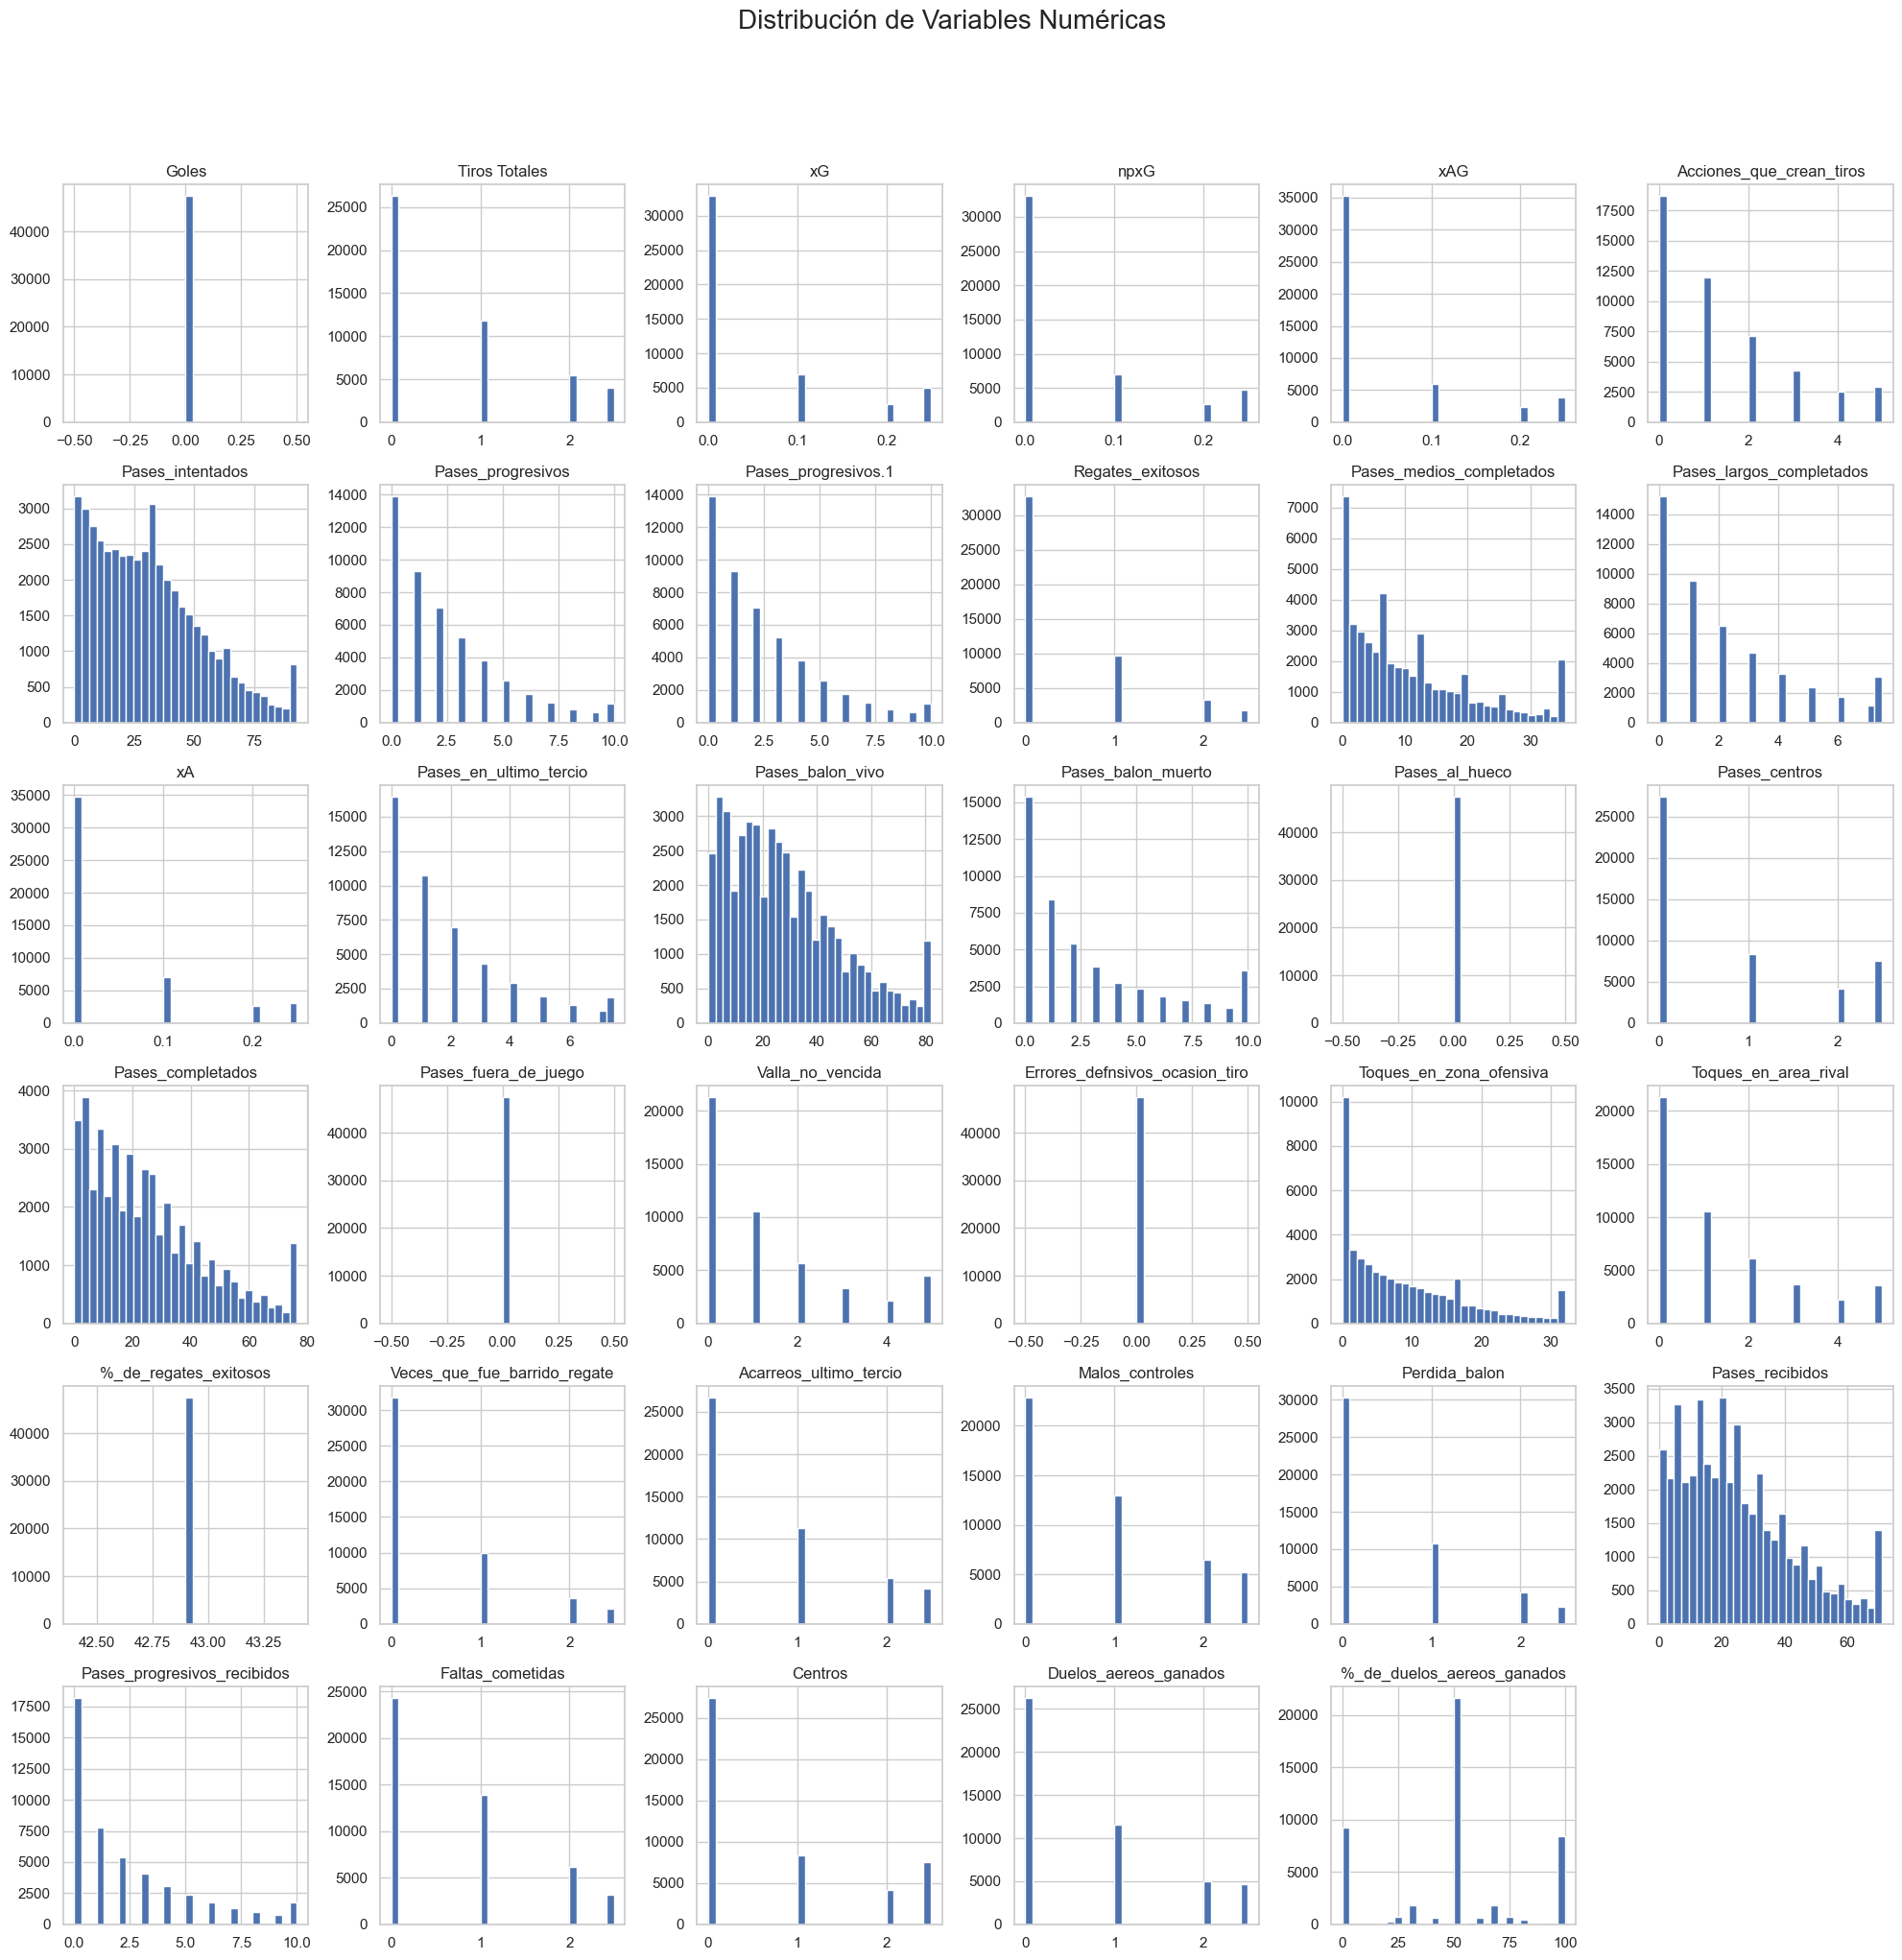

In [33]:
# Histogramas para atributos numéricos

fig = plt.figure(figsize=(20, 20))
df[num_cols].hist(bins=30, figsize=(20, 20))
plt.suptitle("Distribución de Variables Numéricas", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Las distribuciones de las variables numéricas muestran que la mayoría de los valores están muy concentrados en cero y solo unos pocos casos alcanzan cifras altas, lo que genera una fuerte asimetría hacia la derecha. Esto ocurre principalmente en las métricas ofensivas como goles, tiros, goles esperados, asistencias esperadas y centros. 

En contraste, variables relacionadas con pases y toques presentan mayor dispersión aunque también con sesgo hacia valores bajos. Finalmente, las variables expresadas en porcentaje, como éxito en regates o duelos aéreos, muestran una distribución más equilibrada en todo el rango de valores. En conjunto, los datos reflejan la realidad del fútbol: muchos jugadores participan poco en métricas destacadas y unos pocos concentran el rendimiento, lo que explica la gran cantidad de valores atípicos observados.

## 1.6 Variables numéricas y categóricas


In [20]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
dt_cols  = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Numéricas ({len(num_cols)}):", num_cols)
print(f"Categóricas ({len(cat_cols)}):", cat_cols)
print(f"Fechas/tiempo ({len(dt_cols)}):", dt_cols)


Numéricas (43): ['Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1', 'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1', 'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados', 'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros', 'Pases_completados', 'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego', 'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva', 'Toques_en_area_rival', '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros', 'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados']
Categóricas (7): ['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'market_value', 'contract_date']
Fe

## 1.7 Outliers (IQR y boxplots)


Tabla de outliers por variable:


,Q1,Q3,IQR,lim_inf,lim_sup,n_outliers,%_outliers
Goles,0.0,0.0,0.0,0.00,0.00,0.0,0.0
Tiros Totales,0.0,1.0,1.0,-1.50,2.50,0.0,0.0
xG,0.0,0.1,0.1,-0.15,0.25,0.0,0.0
npxG,0.0,0.1,0.1,-0.15,0.25,0.0,0.0
xAG,0.0,0.1,0.1,-0.15,0.25,0.0,0.0
Acciones_que_crean_tiros,0.0,2.0,2.0,-3.00,5.00,0.0,0.0
Pases_intentados,13.0,45.0,32.0,-35.00,93.00,0.0,0.0
Pases_progresivos,0.0,4.0,4.0,-6.00,10.00,0.0,0.0
Pases_progresivos.1,0.0,4.0,4.0,-6.00,10.00,0.0,0.0
Regates_exitosos,0.0,1.0,1.0,-1.50,2.50,0.0,0.0


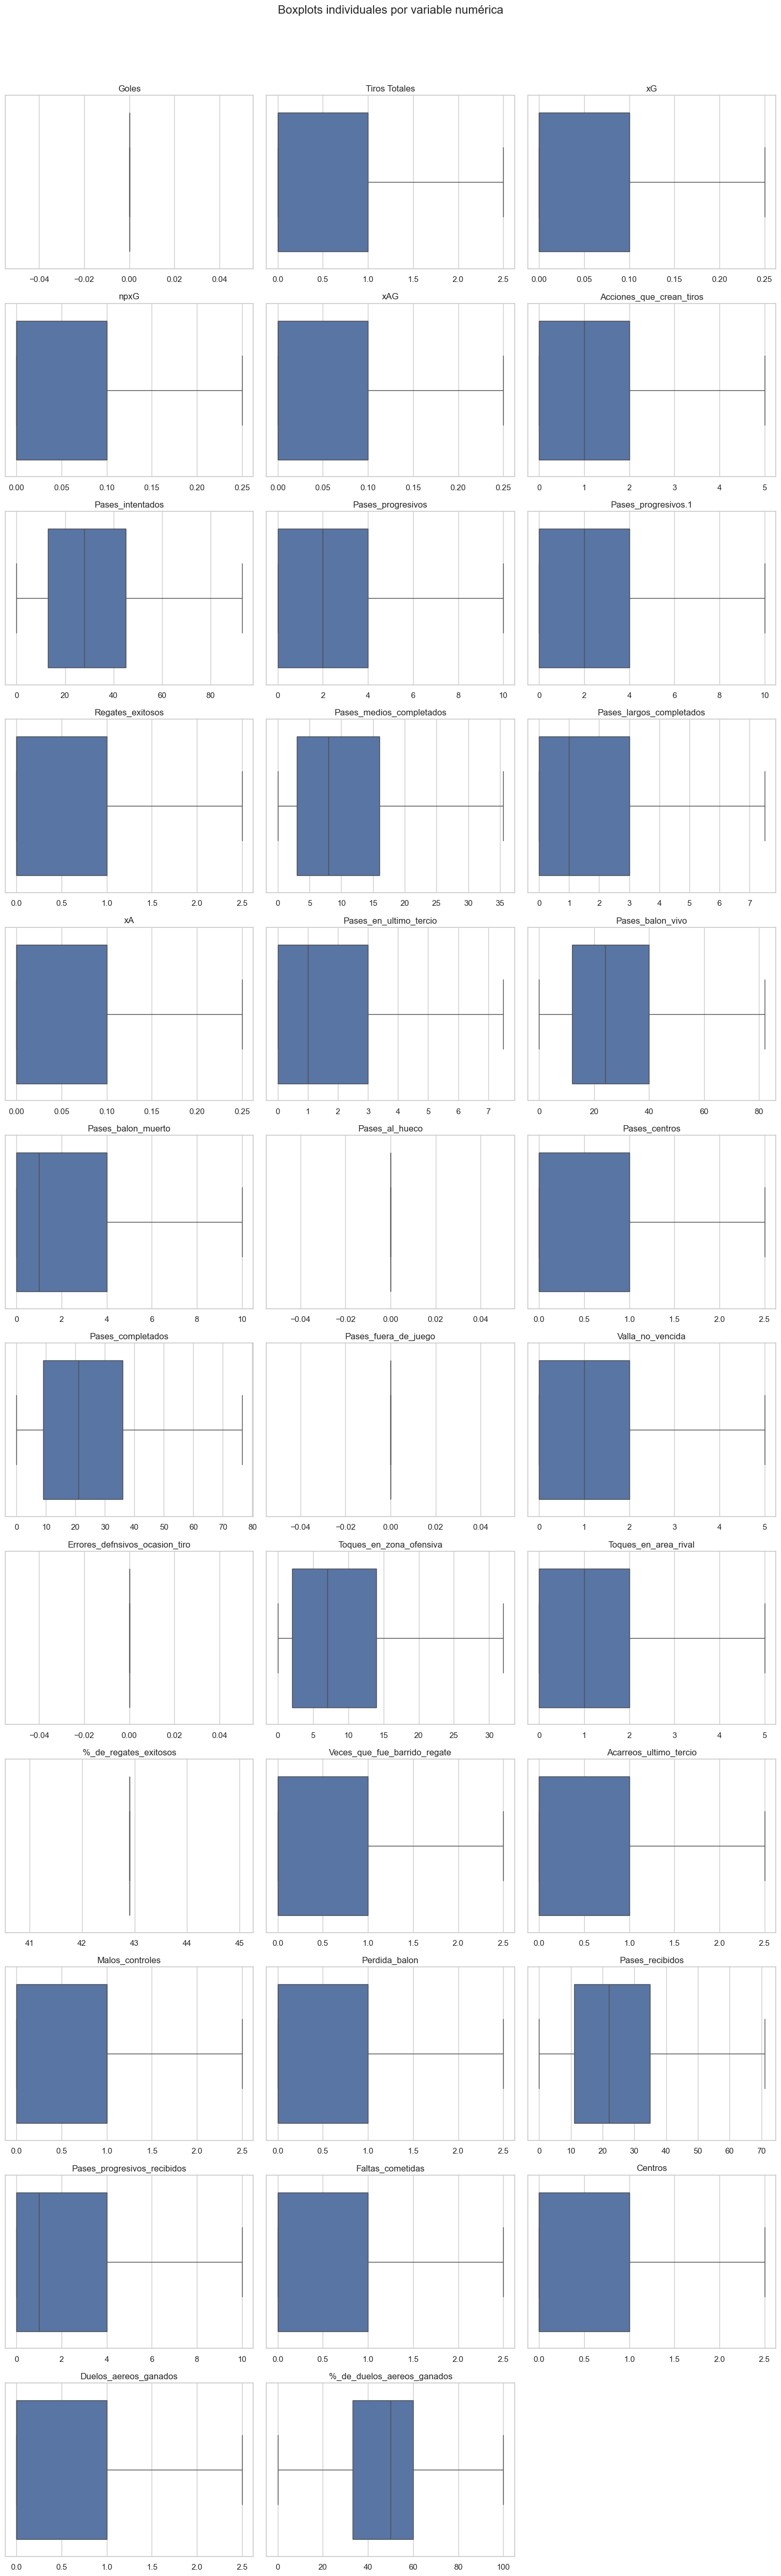

In [29]:
# ==========================================
# Outliers por IQR + Boxplots individuales
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular estadísticas de outliers por IQR
def outlier_stats(s: pd.Series):
    s = s.dropna()
    if s.empty: 
        return pd.Series({'Q1':np.nan, 'Q3':np.nan, 'IQR':np.nan, 
                          'lim_inf':np.nan, 'lim_sup':np.nan, 
                          'n_outliers':0, '%_outliers':0.0})
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5*iqr
    lim_sup = q3 + 1.5*iqr
    n_out = ((s < lim_inf) | (s > lim_sup)).sum()
    pct_out = 100 * n_out / s.size
    return pd.Series({'Q1':q1, 'Q3':q3, 'IQR':iqr, 
                      'lim_inf':lim_inf, 'lim_sup':lim_sup, 
                      'n_outliers':n_out, '%_outliers':pct_out})

# Seleccionamos variables numéricas
num_df = df.select_dtypes(include='number')

if num_df.shape[1] > 0:
    # Tabla de outliers
    tabla_outliers = num_df.apply(outlier_stats, axis=0).T.sort_values('%_outliers', ascending=False)
    print("Tabla de outliers por variable:")
    display(tabla_outliers)

    # Boxplots individuales en grilla
    n = len(num_df.columns)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_df.columns):
        sns.boxplot(x=num_df[col], ax=axes[i], showfliers=True)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel("")  

    # Desactivar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    fig.suptitle("Boxplots individuales por variable numérica", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No hay variables numéricas para evaluar outliers.")


## 1.8 Relciones con Variable Objetivo

In [30]:

def parse_market_value(val):
    try:
        if pd.isna(val):
            return np.nan
        val = str(val).replace("€", "").replace(",", "").strip().lower()

        if val in ["-", "", "nan", "none", "error"]:
            return np.nan

        if val.endswith("m"):   # millones
            return float(val[:-1]) * 1e6
        elif val.endswith("k"): # miles
            return float(val[:-1]) * 1e3
        else:                   # número plano
            return float(val)
    except:
        return np.nan

# Aplicar al DataFrame
df["market_value_num"] = df["market_value"].apply(parse_market_value)

# Escalamos en millones para visualización
df["market_value_millions"] = df["market_value_num"] / 1e6

print(df[["market_value", "market_value_num", "market_value_millions"]].head())


  market_value  market_value_num  market_value_millions
0      €50.00m      5.000000e+07                   50.0
1      €50.00m      5.000000e+07                   50.0
2            -               NaN                    NaN
3    €1000.00m      1.000000e+09                 1000.0
4      €45.00m      4.500000e+07                   45.0


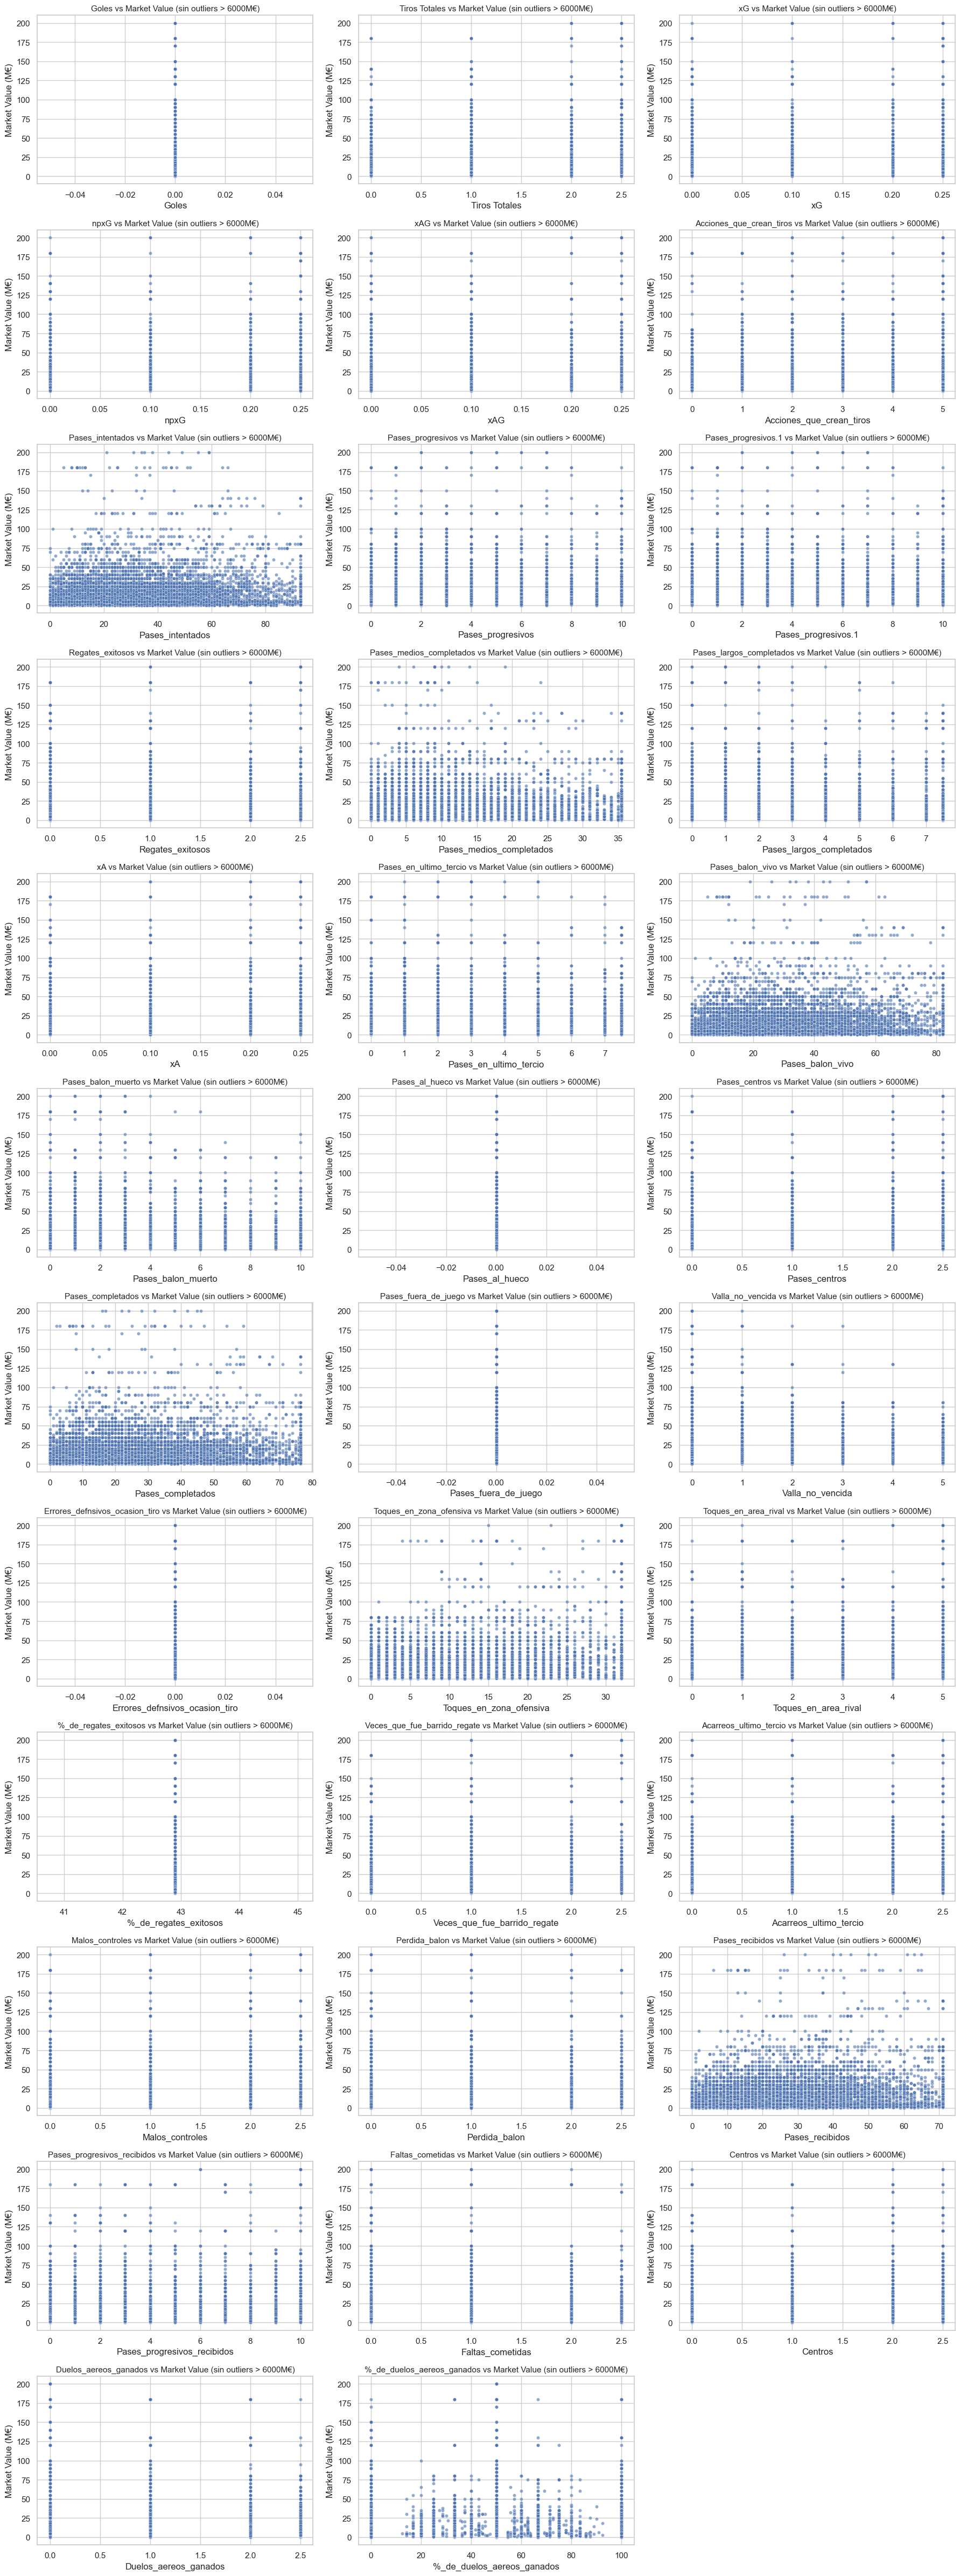

In [32]:
# Filtrar: eliminar valores de market_value_millions mayores a 6000
df_filtrado = df[df["market_value_millions"] < 6000]

# Definir número de columnas y filas para la grilla
n = len(num_cols)
ncols = 3   # puedes cambiarlo a 2 o 4 según lo que prefieras
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

# Graficar scatterplots
for i, col in enumerate(num_cols):
    sns.scatterplot(
        data=df_filtrado.sample(frac=0.2, random_state=42), 
        x=col, 
        y="market_value_millions",
        s=20, alpha=0.6, ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Market Value (sin outliers > 6000M€)", fontsize=11)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Market Value (M€)")

# Desactivar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## 1.9 Correlación (heatmap y pares fuertemente correlacionados)


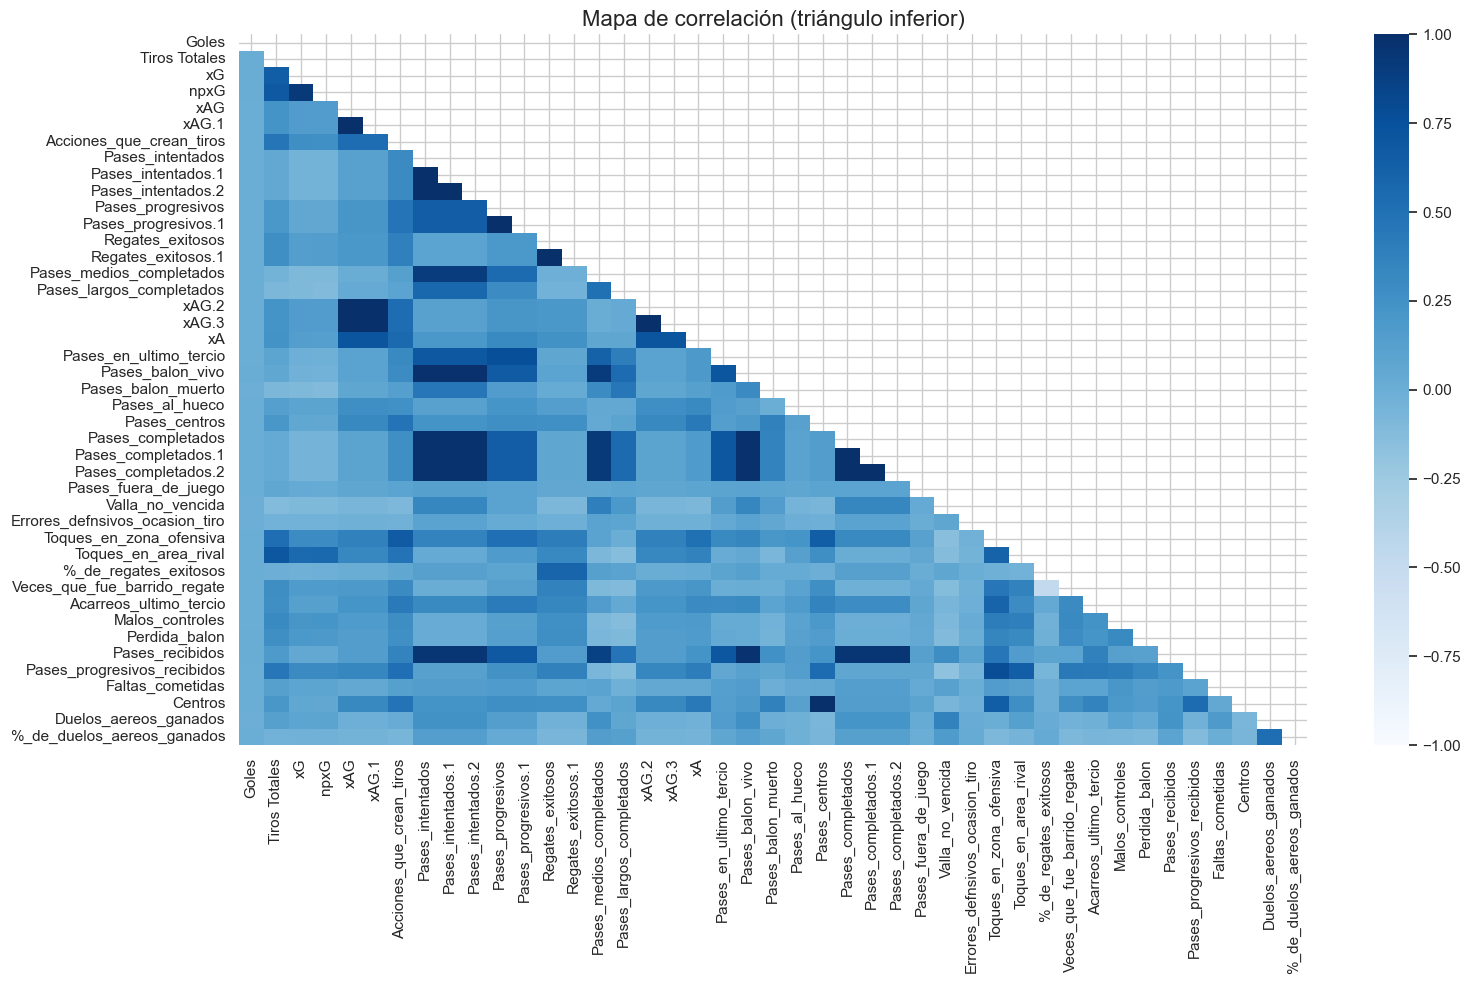

Pares con correlación fuerte (|r| > 0.8):


,Variable_1,Variable_2,Correlación
162,xAG,xAG.1,1.000000
173,xAG,xAG.2,1.000000
210,xAG.1,xAG.2,1.000000
174,xAG,xAG.3,1.000000
211,xAG.1,xAG.3,1.000000
273,Pases_intentados,Pases_intentados.1,1.000000
274,Pases_intentados,Pases_intentados.2,1.000000
733,Pases_completados,Pases_completados.2,1.000000
732,Pases_completados,Pases_completados.1,1.000000
729,Pases_centros,Centros,1.000000


In [22]:
num_cols = df.select_dtypes(include='number').columns.tolist()

if len(num_cols) >= 2:
    # Matriz de correlación
    corr = df[num_cols].corr()

    # Heatmap (solo triángulo inferior)
    plt.figure(figsize=(16,10))
    mask = np.triu(np.ones_like(corr, dtype=bool))  # oculta triángulo superior
    sns.heatmap(corr, mask=mask, cmap="Blues", vmin=-1, vmax=1, cbar=True, annot=False)
    plt.title("Mapa de correlación (triángulo inferior)", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Extraer pares de variables altamente correlacionadas
    high_corr = (
        corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  # tomar solo triángulo inferior
        .stack()  # convertimos a formato largo (pares)
        .reset_index()
    )

    high_corr.columns = ["Variable_1", "Variable_2", "Correlación"]

    # Filtrar correlaciones fuertes
    high_corr = high_corr[high_corr["Correlación"].abs() > 0.8]

    # Mostrar
    print("Pares con correlación fuerte (|r| > 0.8):")
    display(high_corr.sort_values(by="Correlación", ascending=False))
else:
    print("No hay suficientes variables numéricas para calcular correlación.")


# 2. Descripción del proceso de selección de variables 

Con base en la exploración y análisis de correlación, se identifican variables redundantes o duplicadas,
y se definen las variables candidatas para el modelado.


# Conclusiones sobre la correlación de variables

Del gráfico de correlación se observa que algunas variables presentan **correlaciones perfectas (=1)** entre sí, lo que indica que son duplicadas o derivadas:
- **xAG**, **xAG.1**, **xAG.2**, **xAG.3**
- **Pases_intentados**, **Pases_intentados.1**, **Pases_intentados.2**
- **Pases_completados**, **Pases_completados.1**, **Pases_completados.2**
- **Regates_exitosos**, **Regates_exitosos.1**

Existen además variables **fuertemente correlacionadas (|r| > 0.8)** que generan redundancia de información, por ejemplo:
- **Pases_intentados** ↔ **Pases_balon_vivo**
- **Pases_balon_vivo** ↔ **Pases_completados**
- **Pases_completados** ↔ **Pases_recibidos**
- **Pases_intentados** ↔ **Pases_medios_completados**
- **xG** ↔ **npxG**

---

Dado lo anterior, se recomienda eliminar las variables duplicadas o altamente correlacionadas y conservar un subconjunto representativo que mantenga la mayor información posible sin redundancias.

---

## Posibles variables a conservar para el modelo (con menor redundancia):

- Goles
- Tiros Totales
- xG
- xAG
- Acciones_que_crean_tiros
- Pases_progresivos
- Regates_exitosos
- Pases_largos_completados
- Pases_en_ultimo_tercio
- Pases_balon_muerto
- Pases_al_hueco
- Pases_centros
- Valla_no_vencida
- Errores_defnsivos_ocasion_tiro
- Toques_en_zona_ofensiva
- Toques_en_area_rival
- % de regates exitosos
- Veces que fue barrido regate
- Acarreos en último tercio
- Malos controles
- Pérdida de balón
- Pases progresivos recibidos
- Faltas cometidas
- Duelos aéreos ganados
- % de duelos aéreos ganados

# 3. Descripción e implementación del proceso de preparación de datos (incluye la limpieza de datos)
En esta etapa se realiza la **limpieza y preparación del dataset** para que pueda ser utilizado en la construcción de modelos.
Incluye la detección y tratamiento de valores nulos, duplicados, variables redundantes, outliers y la selección final de variables.

## 3.1 Tratamiento de valores duplicados


In [23]:
# Eliminamos filas duplicadas
n_antes = df.shape[0]
df = df.drop_duplicates()
n_despues = df.shape[0]

print(f"Filas eliminadas por duplicados: {n_antes - n_despues}")

Filas eliminadas por duplicados: 10483


## 3.2 Tratamiento de valores nulos


In [24]:
# Revisamos nulos iniciales
print("Valores nulos por variable (antes de imputar):")
nulos_iniciales = df.isna().sum()
display(nulos_iniciales[nulos_iniciales > 0])

# Imputación simple (mediana en numéricas, moda en categóricas)
for col in df.select_dtypes(include='number').columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object', 'category']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Revisamos nulos finales
print("\n Valores nulos por variable (después de imputar):")
nulos_finales = df.isna().sum()
display(nulos_finales[nulos_finales > 0])

print(f"\nTotal de valores nulos después de imputación: {df.isna().sum().sum()}")


Valores nulos por variable (antes de imputar):


Nacionalidad                     31
Edad                             39
%_de_regates_exitosos         23743
%_de_duelos_aereos_ganados    16984
market_value                  10072
contract_date                 10094
dtype: int64


 Valores nulos por variable (después de imputar):


Series([], dtype: int64)


Total de valores nulos después de imputación: 0


## 3.3 Eliminación de variables duplicadas y altamente correlacionadas


In [25]:
# Eliminamos columnas duplicadas (ejemplo con correlación perfecta)
cols_drop = ["xAG.1","xAG.2","xAG.3",
             "Pases_intentados.1","Pases_intentados.2",
             "Pases_completados.1","Pases_completados.2",
             "Regates_exitosos.1"]

df.drop(columns=cols_drop, inplace=True, errors="ignore")
print(f"Variables eliminadas por redundancia: {cols_drop}")


Variables eliminadas por redundancia: ['xAG.1', 'xAG.2', 'xAG.3', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_completados.1', 'Pases_completados.2', 'Regates_exitosos.1']


## 3.4 Tratamiento de outliers


In [26]:
# Método: winsorización (acotar valores extremos con límites IQR)
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lim_inf, lim_inf,
              np.where(df[col] > lim_sup, lim_sup, df[col]))

print("Outliers tratados con winsorización (IQR).")


Outliers tratados con winsorización (IQR).


## 3.5 Selección final de variables

Con base en el análisis de correlación y redundancia, se seleccionan las siguientes variables para el modelado:


In [27]:
vars_finales = [
    "Goles","Tiros Totales","xG","xAG","Acciones_que_crean_tiros",
    "Pases_progresivos","Regates_exitosos","Pases_largos_completados",
    "Pases_en_ultimo_tercio","Pases_balon_muerto","Pases_al_hueco",
    "Pases_centros","Valla_no_vencida","Errores_defnsivos_ocasion_tiro",
    "Toques_en_zona_ofensiva","Toques_en_area_rival","%_de_regates_exitosos",
    "Veces_que_fue_barrido_regate","Acarreos_ultimo_tercio","Malos_controles",
    "Perdida_balon","Pases_progresivos_recibidos","Faltas_cometidas",
    "Duelos_aereos_ganados","%_de_duelos_aereos_ganados"
]

df_final = df[vars_finales]
print("Dimensiones finales del dataset:", df_final.shape)
display(df_final.head())


Dimensiones finales del dataset: (47451, 25)


,Goles,Tiros Totales,xG,xAG,Acciones_que_crean_tiros,Pases_progresivos,Regates_exitosos,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados
0,0.0,2.5,0.25,0.00,2.0,6.0,1.0,4.0,4.0,8.0,0.0,2.5,0.0,0.0,32.0,3.0,42.9,0.0,2.5,1.0,2.0,7.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.25,1.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,26.0,4.0,42.9,2.5,1.0,2.0,1.0,9.0,1.0,1.0,100.0
2,0.0,0.0,0.00,0.10,1.0,1.0,1.0,1.0,1.0,4.0,0.0,2.0,0.0,0.0,22.0,3.0,42.9,0.0,2.5,2.0,2.0,7.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.10,1.0,1.0,1.0,1.0,1.0,4.0,0.0,2.0,0.0,0.0,22.0,3.0,42.9,0.0,2.5,2.0,2.0,7.0,0.0,0.0,0.0
4,0.0,2.0,0.25,0.20,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,3.0,42.9,1.0,0.0,2.0,1.0,3.0,0.0,1.0,50.0
